<a href="https://colab.research.google.com/github/JamshidbekYusupov/Mohirdev_Tutorial_Codes/blob/main/Working_with_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display

In [2]:
ipd.Audio('/content/LJ037-0171.wav')


In [2]:
import os

#audio_list = os.listdir("/content/LJ037-0171.wav")
#audio_list

In [6]:
data, sr = librosa.load("/content/LJ037-0171.wav")

In [7]:
data

array([-4.5776367e-04, -4.2724609e-04, -1.8310547e-04, ...,
        3.0517578e-05, -9.1552734e-05, -9.1552734e-04], dtype=float32)

In [8]:
sr

22050

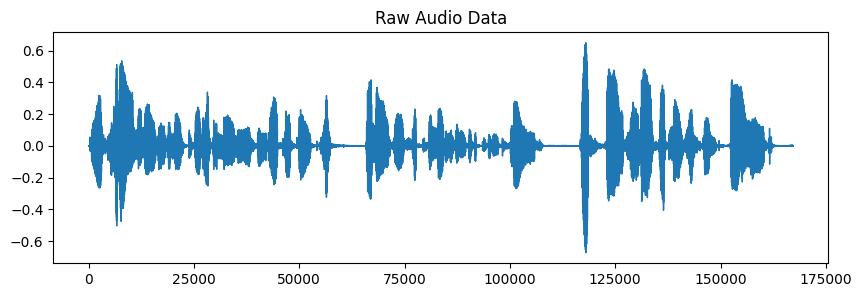

In [13]:
pd.Series(data).plot(figsize = (10,3), lw = 1, title="Raw Audio Data")
plt.show()



<Figure size 1200x300 with 0 Axes>

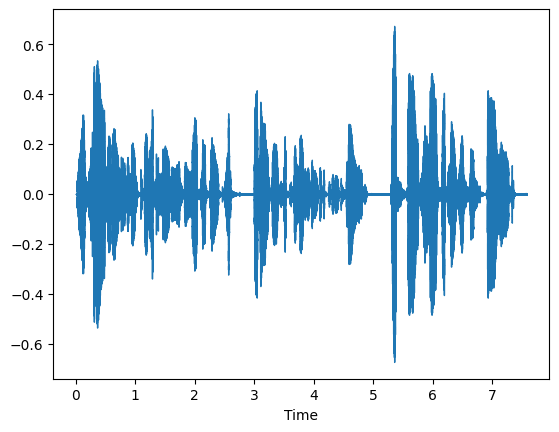

In [12]:
plt.figure(figsize=(12,3))
plt.figure()
librosa.display.waveshow(data, sr = sr)

In [14]:
melspec = librosa.feature.melspectrogram(y = data, sr = sr)
melspec

array([[1.81924806e-05, 4.92471081e-05, 8.06507742e-05, ...,
        2.58793420e-06, 1.36388576e-06, 8.75496153e-06],
       [3.06239490e-05, 4.73715452e-04, 1.70544093e-03, ...,
        1.08740685e-04, 9.33800911e-05, 8.49097123e-05],
       [4.71250969e-05, 5.27490047e-04, 1.16669165e-03, ...,
        4.08626984e-05, 4.60587326e-05, 4.73942346e-05],
       ...,
       [4.59802308e-04, 8.20459973e-04, 1.72933112e-04, ...,
        2.20565411e-07, 3.11759834e-07, 5.00590716e-07],
       [2.22051342e-04, 4.40874370e-04, 8.89817020e-05, ...,
        1.09030722e-07, 8.73480133e-08, 1.50558492e-07],
       [2.27522924e-05, 4.47949460e-05, 1.32495807e-05, ...,
        2.06578523e-08, 2.01375130e-08, 4.08326919e-08]], dtype=float32)

In [15]:
log_s = librosa.amplitude_to_db(melspec)
log_s

array([[-24.754105, -24.754105, -24.754105, ..., -24.754105, -24.754105,
        -24.754105],
       [-24.754105, -24.754105, -24.754105, ..., -24.754105, -24.754105,
        -24.754105],
       [-24.754105, -24.754105, -24.754105, ..., -24.754105, -24.754105,
        -24.754105],
       ...,
       [-24.754105, -24.754105, -24.754105, ..., -24.754105, -24.754105,
        -24.754105],
       [-24.754105, -24.754105, -24.754105, ..., -24.754105, -24.754105,
        -24.754105],
       [-24.754105, -24.754105, -24.754105, ..., -24.754105, -24.754105,
        -24.754105]], dtype=float32)

Text(0.5, 1.0, 'Mel power spectogram')

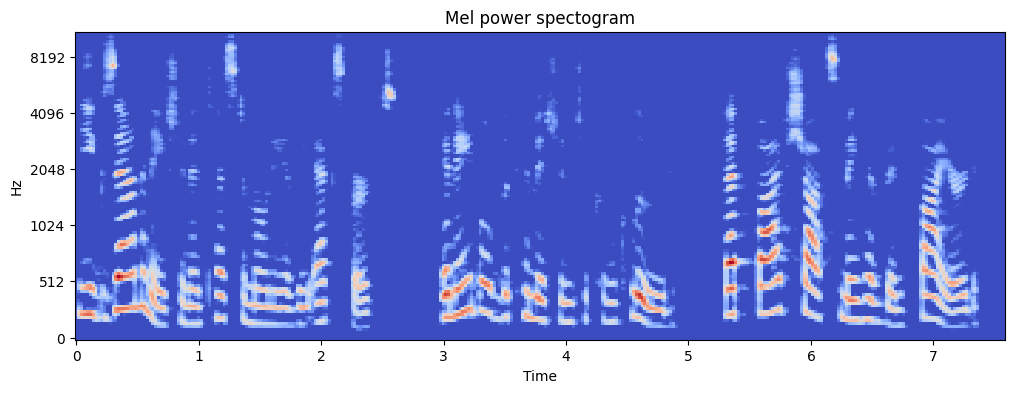

In [21]:

plt.figure(figsize=(12,4))
librosa.display.specshow(log_s, sr = sr, x_axis="time", y_axis="mel")
plt.title("Mel power spectogram")

#DATA AUGMENTATION

In [5]:
ipd.Audio("/content/audios/common_voice_uz_41272505.mp3")

In [6]:
data, sr = librosa.load("/content/audios/common_voice_uz_41272505.mp3")

data

array([-3.4570638e-12,  5.4310701e-12, -9.7588983e-14, ...,
        6.1773621e-06, -9.8757009e-06,  0.0000000e+00], dtype=float32)

<Figure size 1000x300 with 0 Axes>

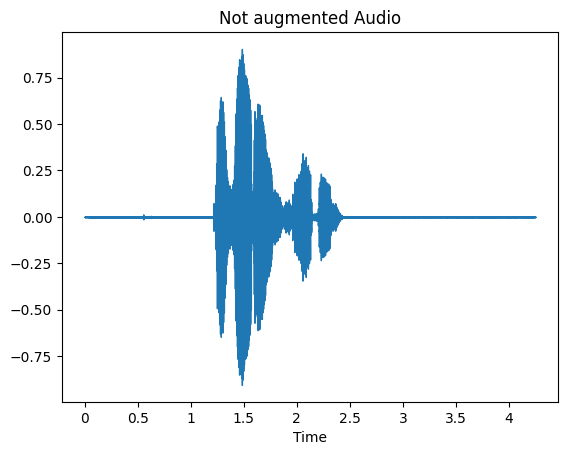

In [38]:
### Not augmented audio

plt.figure(figsize=(10,3))
plt.figure()
librosa.display.waveshow(y = data, sr=sr)
plt.title("Not augmented Audio")
plt.show()

In [7]:
len(data)

93669

In [8]:
def add_white_noise(signal, noise_percentage_factor):
  noise = np.random.normal(0, signal.std(), signal.size)
  augmented_signal = signal + noise + noise_percentage_factor
  return augmented_signal

In [33]:
augmented_signal = add_white_noise(data, 0.03)

<Figure size 1000x300 with 0 Axes>

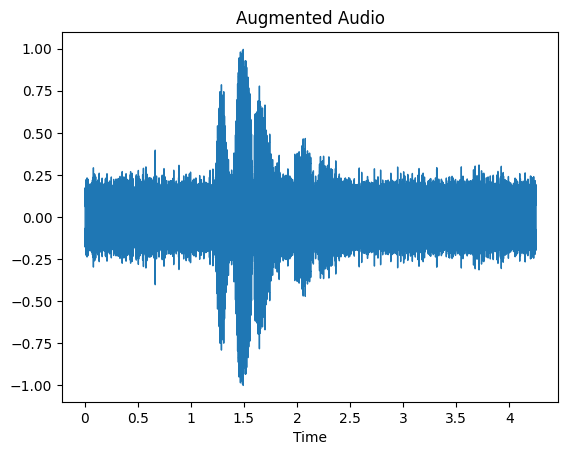

In [37]:
### Augmented audio

plt.figure(figsize=(10,3))
plt.figure()
librosa.display.waveshow(y = augmented_signal, sr=sr)
plt.title("Augmented Audio")
plt.show()

In [19]:
import soundfile as sf

In [35]:
sf.write("augmented_audio_noise.wav", augmented_signal, sr)

In [36]:
ipd.Audio("/content/augmented_audio_noise.wav")

In [39]:
def time_streched(signal, time_streched_rate):
  return librosa.effects.time_stretch(signal, rate = time_streched_rate)


In [48]:
augmenetd_signal = time_streched(data,time_streched_rate= 1.2)
sf.write("augmenetd_audio_time_stretch.wav", augmenetd_signal, sr)

In [49]:
ipd.Audio("/content/augmenetd_audio_time_stretch.wav")

In [50]:
def pitch_scale(signal, sr = 22050, num_semitones = 2):
  return librosa.effects.pitch_shift(y = signal, sr = sr, n_steps=num_semitones)

In [51]:
augmenetd_signal = pitch_scale(data, num_semitones=-2)
sf.write('/content/augmenetd_audio_pitch_stretch.wav', augmenetd_signal, sr)

In [53]:
ipd.Audio('/content/augmenetd_audio_pitch_stretch.wav')